In [2]:
import torch, torchvision
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()
import copy
import glob
import pandas as pd
import os
import pickle
 
import os
import ntpath
import numpy as np
import cv2
import random
import itertools
import pandas as pd
from tqdm import tqdm
import urllib
import json
import PIL.Image as Image

from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor, DefaultTrainer
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer, ColorMode
from detectron2.data import DatasetCatalog, MetadataCatalog, build_detection_test_loader
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.structures import BoxMode

import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

ModuleNotFoundError: No module named 'torch'

In [28]:
faces_df = pd.read_csv('../OpenCV-Python-Series-master/src/images/csv/farid.csv')

df = pd.DataFrame(faces_df)

In [29]:
image = df['image']
xmin = df['xmin']
ymin = df['ymin']
xmax = df['xmax']
ymax = df['ymax']
len(image)

15

In [30]:
import numpy as np
import cv2

imgs = list(sorted(os.listdir(os.path.join('../OpenCV-Python-Series-master/src/images/farid', "pic"))))
imglist=[]
imglist2=[]
for  a in range(len(image)):
    for  aa in range(len(image)):  
        if imgs[aa]==image[a]:
            img_path =os.path.join('../OpenCV-Python-Series-master/src/images/farid/pic/', imgs[aa])

            img = cv2.imread(img_path) 
            img2 =copy.deepcopy(img)
            cimg = img2[  int(ymin[aa]):int(ymax[aa]),  int(xmin[aa]):int(xmax[aa])  ]
            cv2.imwrite(str("c{aa}")+imgs[aa], cimg)
            img = cv2.rectangle(img,(int(xmin[aa]) ,int(ymin[aa])) ,(int(xmax[aa]),int(ymax[aa]) ), (255,0 , 0), 12)
            imglist2.append(cimg)
            imglist.append(img)
 
# reads image 'opencv-logo.png' as grayscale
#img = cv2.imread('../OpenCV-Python-Series-master/src/images/farid/20210904_131410.jpg' ) 

len(imglist2)

14

In [31]:
img1 = cv2.resize(imglist[7], (480, 639), interpolation = cv2.INTER_AREA)
#cv2.namedWindow('Roba robot Example', cv2.WINDOW_NORMAL)
cv2.imshow('image',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [44]:
imglist3=[]
for im in imglist2:
    img3 = cv2.resize(im,(384, 384), interpolation = cv2.INTER_AREA)
    imglist3.append(img3)
    cv2.imshow('image',img3)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [35]:
sample_images = torch.as_tensor(imglist3)

In [36]:
sample_images.shape

torch.Size([14, 384, 384, 3])

In [37]:
sample_images = sample_images.permute(0, 3, 1, 2)

In [38]:
sample_images.shape

torch.Size([14, 3, 384, 384])

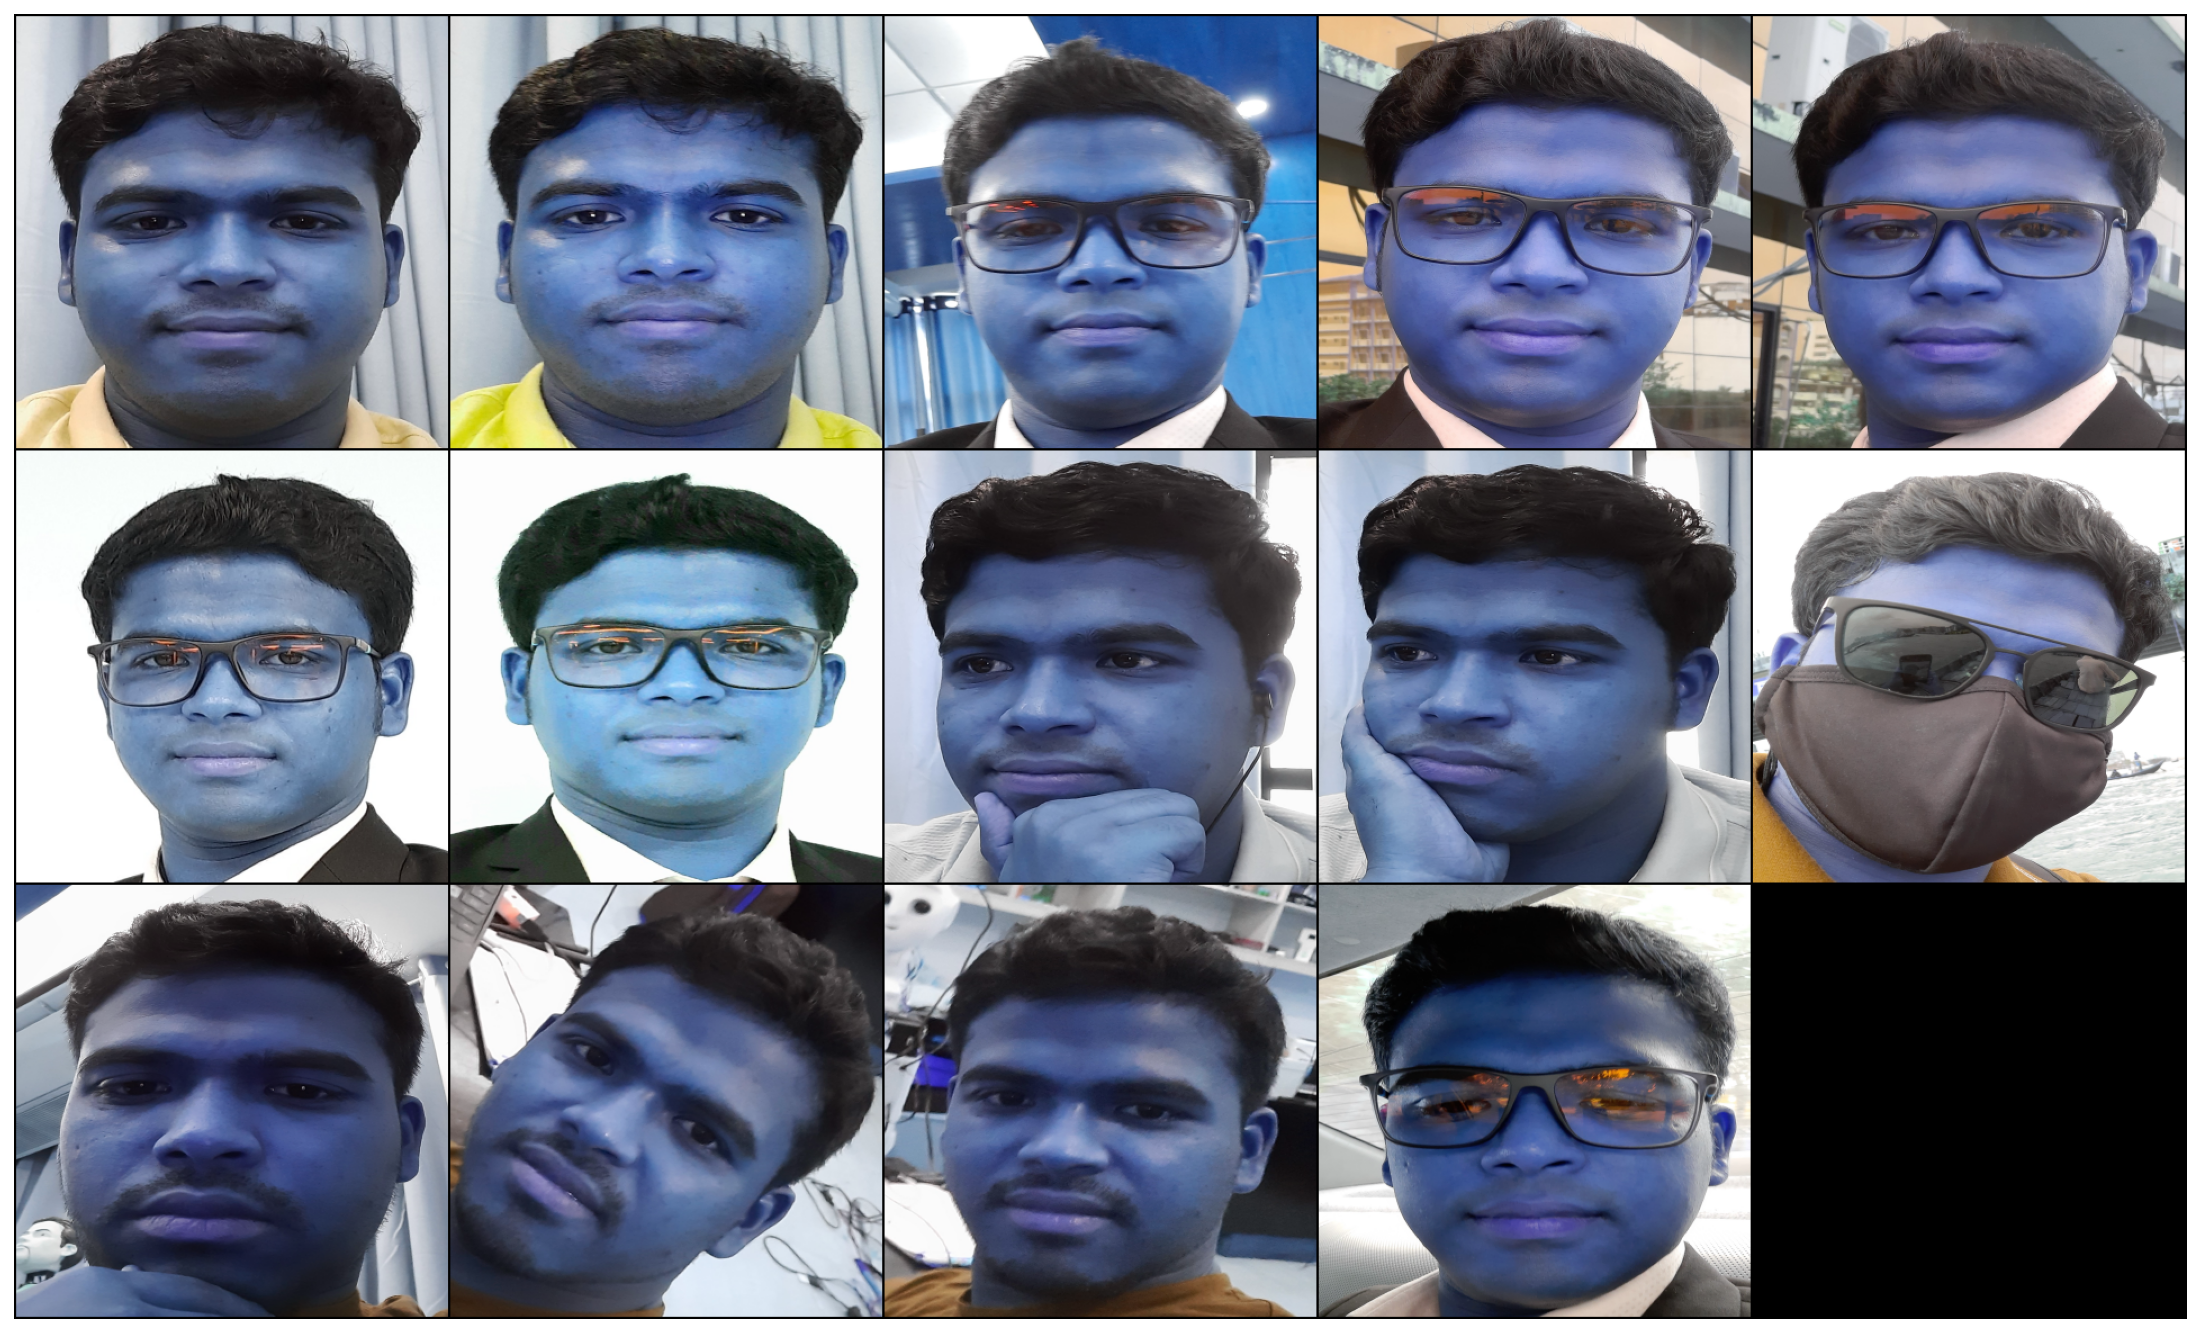

In [39]:
plt.figure(figsize=(24, 12))
grid_img = torchvision.utils.make_grid(sample_images, nrow=5)

plt.imshow(grid_img.permute(1, 2, 0))
plt.axis('off');

In [43]:
classes = df['label']

In [2]:
import torch
from IPython.display import Image, clear_output  # to display images

# clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.8.1a0+56b43f4 (NVIDIA Tegra X1)


In [1]:
import math
import time
import cv2
import numpy as np
import pyrealsense2 as rs
import copy
from IPython.display import clear_output

In [2]:

cap = cv2.VideoCapture(1)

cap.set(cv2.CAP_PROP_FRAME_WIDTH, 848)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)
i=0
while(True):
        i=i+1
        # Capture frame-by-frame
        ret, frame = cap.read()
        image =copy.deepcopy(frame)
        #image2 =copy.deepcopy(frame)
        filename=str(i)+".jpg"
#         cv2.imwrite(filename, image)
#         if i==5:
#             break
            # image2 = obj_tedection(image,image2)
        # image = find_faces(image2)
        
        cv2.imshow('frame',image)
        if cv2.waitKey(20) & 0xFF == ord('q'):
             break
cap.release()
cv2.destroyAllWindows()

In [ ]:
!lsmod

In [11]:
import pyrealsense2 as rs
# Import Numpy for easy array manipulation
import numpy as np
# Import OpenCV for easy image rendering
import cv2

# Create a pipeline
pipeline = rs.pipeline()

# Create a config and configure the pipeline to stream
#  different resolutions of color and depth streams
config = rs.config()

# Get device product line for setting a supporting resolution
pipeline_wrapper = rs.pipeline_wrapper(pipeline)
pipeline_profile = config.resolve(pipeline_wrapper)
device = pipeline_profile.get_device()
device_product_line = str(device.get_info(rs.camera_info.product_line))

found_rgb = False
for s in device.sensors:
    if s.get_info(rs.camera_info.name) == 'RGB Camera':
        found_rgb = True
        break
if not found_rgb:
    print("The demo requires Depth camera with Color sensor")
    exit(0)
dep_color_imgx = 848
dep_color_imgy = 480
#colorimage = 1280,720

config.enable_stream(rs.stream.depth, dep_color_imgx , dep_color_imgy , rs.format.z16, 30)
config.enable_stream(rs.stream.color,  rs.format.bgr8, 30)

# Start streaming
profile = pipeline.start(config)

# Getting the depth sensor's depth scale (see rs-align example for explanation)
depth_sensor = profile.get_device().first_depth_sensor()
depth_scale = depth_sensor.get_depth_scale()
print("Depth Scale is: " , depth_scale)

# We will be removing the background of objects more than
#  clipping_distance_in_meters meters away
clipping_distance_in_meters = 1 #1 meter
# clipping_distance = clipping_distance_in_meters / depth_scale

# Create an align object
# rs.align allows us to perform alignment of depth frames to others frames
# The "align_to" is the stream type to which we plan to align depth frames.
align_to = rs.stream.color
align = rs.align(align_to)


Depth Scale is:  0.0010000000474974513


In [ ]:

try:
    while True:

        # Get frameset of color and depth
        frames = pipeline.wait_for_frames()
        # frames.get_depth_frame() is a 640x360 depth image

        # Align the depth frame to color frame
        aligned_frames = align.process(frames)

        # Get aligned frames
        aligned_depth_frame = aligned_frames.get_depth_frame() # aligned_depth_frame is a 640x480 depth image
        color_frame = aligned_frames.get_color_frame()

        # Validate that both frames are valid
        if not aligned_depth_frame or not color_frame:
            continue

        depth_image = np.asanyarray(aligned_depth_frame.get_data())
        color_image = np.asanyarray(color_frame.get_data())


        cv2.namedWindow('Roba robot Example', cv2.WINDOW_NORMAL)
        cv2.imshow('Roba robot Example', color_image)
        key = cv2.waitKey(1)
        # Press esc or 'q' to close the image window
        if key & 0xFF == ord('q') or key == 27:
            cv2.destroyAllWindows()
            break
finally:
    pipeline.stop()
    print("break")